In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Used to do plots
%matplotlib inline

import nltk 
from nltk.corpus import stopwords # Stopwords 
from nltk.tokenize import word_tokenize # Word_tokenizer
from nltk.stem.porter import PorterStemmer
from pattern.text.en import singularize

from pandarallel import pandarallel # Parallel workers on pandas dataframe

import unidecode
import re 
import time
import string
import statistics

from datetime import datetime

ModuleNotFoundError: No module named 'pandarallel'

In [9]:
!pip install pattern

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 201.5 kB/s eta 0:00:00m eta 0:00:010:00:03
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 339.8 kB/s eta 0:00:001m362.1 kB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.8/349.8 kB 308.8 kB/s eta 0:00:001m336.8 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 352.7 kB/s eta 0:00:00 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 219.0 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 220.7 kB/s eta 0:00:001m216.4 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 185.9 kB/s eta 0:00:00 kB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 204.1 kB/s eta

  Created wheel for pattern: filename=Pattern-3.6-py3-none-any.whl size=22332702 sha256=87d88aa6ebbfcb7d72318a2a3f803172542546b39356f04a9963ee0f84e0b5d9
  Stored in directory: /Users/ramtin/Library/Caches/pip/wheels/50/33/f3/ea00b80d50c09f210588bda15ec60bdb38b289b452577cd5c3
  Created wheel for mysqlclient: filename=mysqlclient-2.2.4-cp39-cp39-macosx_11_0_arm64.whl size=73775 sha256=486b18a9927e86835857d7cd65ca1488f7324577c97c4f1c9d6d8c90b2926cbb
  Stored in directory: /Users/ramtin/Library/Caches/pip/wheels/df/23/68/faa07b93488a130b3295ca4e91574e85a9dc4764cd463bc152
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6048 sha256=1143b02b589d8d7c77c44e86a44ce647e51698927b9243e3964e0562e3ef887d
  Stored in directory: /Users/ramtin/Library/Caches/pip/wheels/65/7a/a7/78c287f64e401255dff4c13fdbc672fed5efbfd21c530114e1
Successfully built pattern mysqlclient sgmllib3k
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.8.0


In [14]:
df_reviews = pd.read_json('kaggle/input/IMDB_reviews.json', lines=True) 
print('User reviews shape: ', df_reviews.shape)

User reviews shape:  (573913, 7)


In [15]:
df_reviews.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"


In [16]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573913 entries, 0 to 573912
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   review_date     573913 non-null  object
 1   movie_id        573913 non-null  object
 2   user_id         573913 non-null  object
 3   is_spoiler      573913 non-null  bool  
 4   review_text     573913 non-null  object
 5   rating          573913 non-null  int64 
 6   review_summary  573913 non-null  object
dtypes: bool(1), int64(1), object(5)
memory usage: 26.8+ MB


In [17]:
df_details = pd.read_json('kaggle/input/IMDB_movie_details.json', lines=True) 
print('User reviews shape: ', df_details.shape)

User reviews shape:  (1572, 7)


In [18]:
df_details.head()

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...


In [20]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       1572 non-null   object 
 1   plot_summary   1572 non-null   object 
 2   duration       1572 non-null   object 
 3   genre          1572 non-null   object 
 4   rating         1572 non-null   float64
 5   release_date   1572 non-null   object 
 6   plot_synopsis  1572 non-null   object 
dtypes: float64(1), object(6)
memory usage: 86.1+ KB


In [28]:
df_analysed_reviews = df_reviews.copy()
df_analysed_reviews.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"


In [52]:
stop_words = list(set(stopwords.words('english')))
len_1 = []
for w in word_tokenize(df_reviews.iloc[0][4]):
    if len(w) == 1:
        len_1.append(w)
        
for sym in len_1:
    stop_words.append(sym)
stop_words = set(stop_words)

In [53]:
ps = PorterStemmer()

In [56]:
bad_words = ["die", "dying", "died", "kill", "killed", "killing", "cheat", "cheating", "cheated"]
bad_words = set([ps.stem(w) for w in bad_words])
bad_words = list(bad_words)
bad_words

['cheat', 'die', 'kill']

In [57]:
df_analysed_reviews["bad_flag"] = [any([y.lower() in bad_words
                                    for y in [ps.stem(w) for w in word_tokenize(x[4]) if not w.lower() in stop_words]])
                                   for x in df_reviews.values]

In [58]:
df_analysed_reviews.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary,bad_flag
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.,True
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.,False
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film,True
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?,True
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted",False


Percentage distribution in the dataset of spoilers and not spoilers 

False    73.7
True     26.3
Name: is_spoiler, dtype: float64


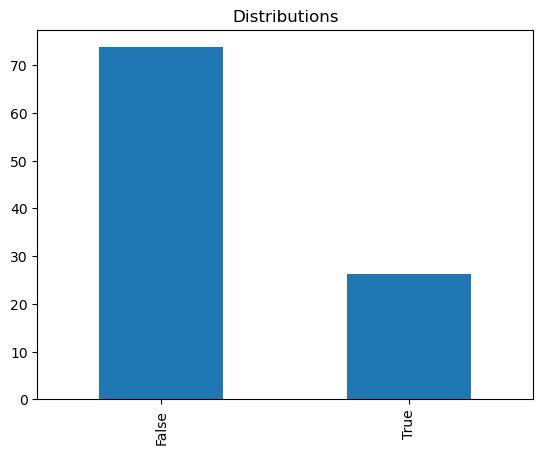

In [50]:
print('Percentage distribution in the dataset of spoilers and not spoilers \n')

# Compute distribution between classes
print(round(df_reviews.is_spoiler.value_counts(normalize=True)*100,2)) 
# Plot distribution between classes 
round(df_reviews.is_spoiler.value_counts(normalize=True)*100,2).plot(kind='bar')

plt.title('Distributions')
plt.show()

In [60]:
df_analysed_reviews.iloc[1][4]

'The Shawshank Redemption is without a doubt one of the most brilliant movies I have ever seen. Similar to The Green Mile in many respects (and better than it in almost all of them), these two movies have shown us that Stephen King is a master not only of horror but also of prose that shakes the soul and moves the heart. The plot is average, but King did great things with it in his novella that are only furthered by the direction, and the acting is so top-rate it\'s almost scary.Tim Robbins plays Andy Dufrane, wrongly imprisoned for 20 years for the murder of his wife. The story focuses on Andy\'s relationship with "Red" Redding (Morgan Freeman, in probably his best role) and his attempts to escape from Shawshank. Bob Gunton is positively evil and frightening as Warden Norton, and there are great performances and cameos all around; the most prominent one being Gil Bellows (late as Billy of Ally McBeal) as Tommy, a fellow inmate of Andy\'s who suffers under the iron will of Norton.If yo